In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 303ms/step - accuracy: 0.2918 - loss: 1.9478 - val_accuracy: 0.4505 - val_loss: 1.5225
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 79s 283ms/step - accuracy: 0.4944 - loss: 1.4137 - val_accuracy: 0.5103 - val_loss: 1.3609
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 285ms/step - accuracy: 0.5538 - loss: 1.2616 - val_accuracy: 0.5169 - val_loss: 1.3813
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 307ms/step - accuracy: 0.5793 - loss: 1.1950 - val_accuracy: 0.5998 - val_loss: 1.1460
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 296ms/step - accuracy: 0.6122 - loss: 1.1070 - val_accuracy: 0.6136 - val_loss: 1.1218
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 325ms/step - accuracy: 0.6345 - loss: 1.0534 - val_accuracy: 0.6271 - val_loss: 1.0735
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 297ms/step - accuracy: 0.6495 - loss: 1.0011 - val_accuracy: 0.6197 - val_loss: 1.0891
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 79s 279ms/step - accuracy: 0.6647 - loss: 0

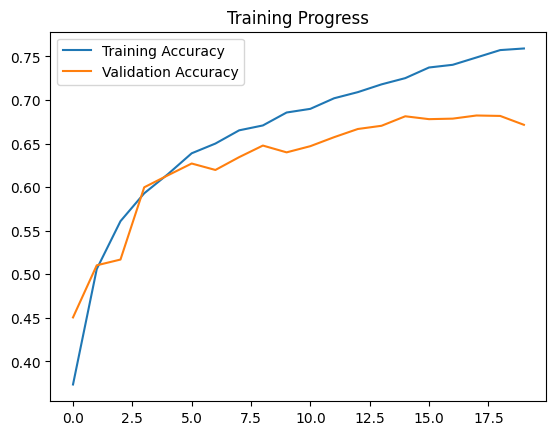

In [14]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=256,
                    validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training Progress')
plt.legend()
plt.show()